<a href="https://colab.research.google.com/github/SaimaBZ/temp2/blob/main/transfer_learning_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torchvision

In [13]:
import torch
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.transforms import AutoAugment, AutoAugmentPolicy

train_data = datasets.CIFAR10(root = "data", train = True, download = True, transform = auto_transform)
test_data = datasets.CIFAR10(root = "data", train = False, download = True, transform = auto_transform)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
print(train_data.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:

from torchvision.transforms import AutoAugment, AutoAugmentPolicy

auto_transform = transforms.Compose([
    AutoAugment(policy=AutoAugmentPolicy.IMAGENET),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [6]:
train_loader = DataLoader(train_data,batch_size = 32, shuffle = True)
test_loader = DataLoader(test_data,batch_size = 32, shuffle = True )

In [7]:
from torchvision import models
model = models.resnet50(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s]


In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [23]:
from torchsummary import summary
summary(model, input_size =(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [24]:
import torch.nn as nn

#freezing the base model
for param in model.parameters():
  param.requires_grad = False

model.fc = nn.Linear(in_features = model.fc.in_features, out_features = 10)

In [25]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)

In [26]:

epochs = 5
model = model.to(device)
for epoch in range(epochs):
  for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch {epoch+1}, Loss: {loss.item()}")


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

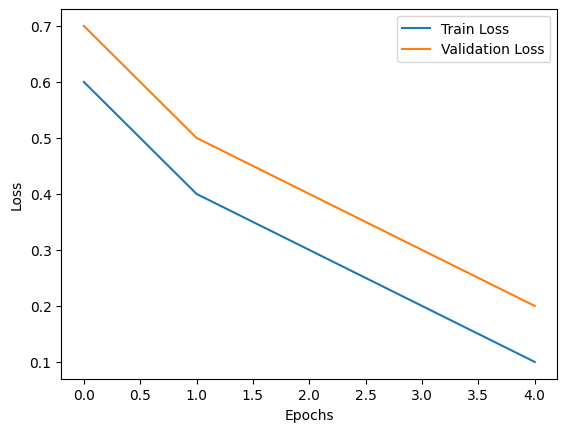

In [15]:
import matplotlib.pyplot as plt

# Example loss curves (train and validation loss stored during training)
train_losses = [0.6, 0.4, 0.3, 0.2, 0.1]
val_losses = [0.7, 0.5, 0.4, 0.3, 0.2]

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [16]:
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [19]:
from PIL import Image
import torch.nn.functional as F

# Load an image and apply the transform
image_path = "/content/download.jpg"
image = Image.open(image_path).convert("RGB")
transformed_image = auto_transform(image).unsqueeze(0).to(device)

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(transformed_image)
    probabilities = F.softmax(outputs, dim=1)
    predicted_class = probabilities.argmax(dim=1).item()

print(f"Predicted Class: {predicted_class} ")


Predicted Class: 3 


In [20]:
for label, class_name in enumerate(train_data.classes):
    print(f"Class Label: {label}, Class Name: {class_name}")

Class Label: 0, Class Name: airplane
Class Label: 1, Class Name: automobile
Class Label: 2, Class Name: bird
Class Label: 3, Class Name: cat
Class Label: 4, Class Name: deer
Class Label: 5, Class Name: dog
Class Label: 6, Class Name: frog
Class Label: 7, Class Name: horse
Class Label: 8, Class Name: ship
Class Label: 9, Class Name: truck
